In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_df = pd.read_csv(r"D:\GCOEN\DS ExcelR Assignments\XGBM & LGBM\Titanic_train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.shape

(891, 12)

In [5]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_df.describe(include = 'object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [9]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
train_df = train_df.fillna(train_df.mean())
train_df['Embarked'] = train_df['Embarked'].fillna('S')

In [12]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [13]:
train_df['Survived'] = train_df['Survived'].astype(str)
train_df['Pclass'] = train_df['Pclass'].astype(str)
train_df['SibSp'] = train_df['SibSp'].astype(str)
train_df['Parch'] = train_df['Parch'].astype(str)

<Axes: >

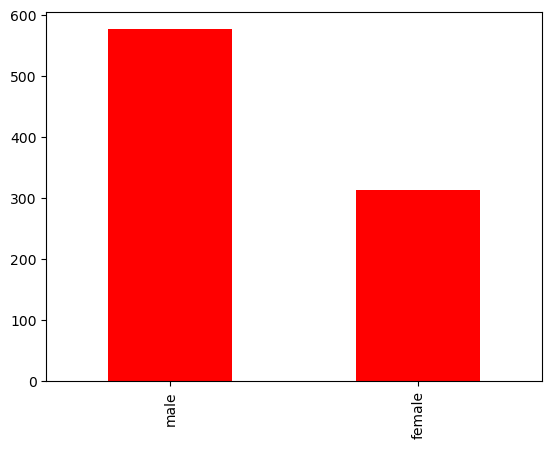

In [14]:
train_df['Sex'].value_counts().plot(kind='bar', color='red')

<Axes: ylabel='Pclass'>

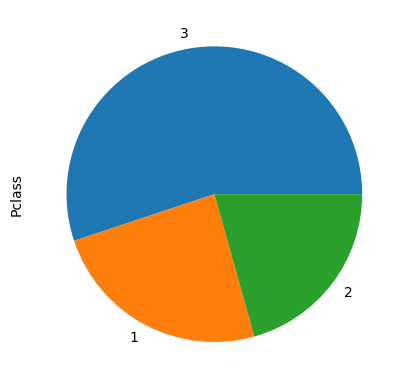

In [15]:
train_df['Pclass'].value_counts().plot(kind='pie')

In [16]:
train_df['Fare'].max()

512.3292

In [17]:
train_df['Fare'].min()

0.0

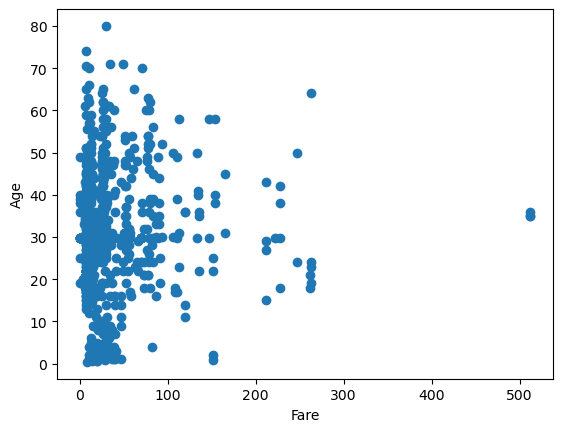

In [18]:
plt.scatter(train_df['Fare'], train_df['Age'])
plt.xlabel('Fare')
plt.ylabel('Age')
plt.show()

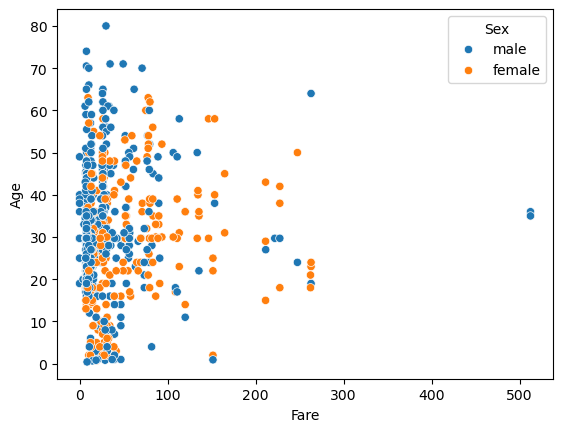

In [19]:
sns.scatterplot(x = train_df['Fare'], y = train_df['Age'], hue=train_df['Sex'])
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
train_df['Sex'] = lb.fit_transform(train_df['Sex'])
train_df['Embarked'] = lb.fit_transform(train_df['Embarked'])
train_df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [21]:
train_df['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [22]:
test_df = pd.read_csv(r"D:\GCOEN\DS ExcelR Assignments\XGBM & LGBM\Titanic_test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
test_df.shape

(418, 11)

In [24]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [25]:
test_df.nunique()

PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
dtype: int64

In [26]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [27]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
test_df['Sex'] = lb.fit_transform(test_df['Sex'])
test_df['Embarked'] = lb.fit_transform(test_df['Embarked'])
test_df['Sex'].value_counts()

1    266
0    152
Name: Sex, dtype: int64

In [28]:
test_df['Embarked'].value_counts()

2    270
0    102
1     46
Name: Embarked, dtype: int64

In [29]:
def clean(train_df):
    train_df = train_df.drop(['Ticket', 'Cabin', 'Name', 'PassengerId', 'SibSp', 'Parch', 'Embarked'], axis=1)
    cols = ['Fare', 'Age']
    for col in cols:
        train_df[col].fillna(train_df[col].mean(), inplace=True)
    return train_df
train_df = clean(train_df)
test_df = clean(test_df)

In [30]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [31]:
test_df.head()

,Pclass,Sex,Age,Fare
0,3,1,34.5,7.8292
1,3,0,47.0,7.0000
2,2,1,62.0,9.6875
3,3,1,27.0,8.6625
4,3,0,22.0,12.2875


In [32]:
# Convert Pclass to int (if it's not already)
train_df['Pclass'] = train_df['Pclass'].astype(int)
train_df['Survived'] = train_df['Survived'].astype(int)

In [33]:
x = train_df.drop(columns = ['Survived'])
y = train_df['Survived']

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(668, 4)
(223, 4)
(668,)
(223,)


In [35]:
train_df.dtypes

Survived      int32
Pclass        int32
Sex           int32
Age         float64
Fare        float64
dtype: object

In [36]:
# Training LightGBM model
import lightgbm as lgb
from sklearn.metrics import accuracy_score
# Prepare datasets for LightGBM
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test, reference=train_data)

# Define parameters
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
}

# Train the model
lgb_model = lgb.train(params, train_data, valid_sets=[test_data], early_stopping_rounds=10)

# Predict and evaluate the model
y_pred_lgb = lgb_model.predict(x_test)
y_pred_lgb = np.round(y_pred_lgb)  # Convert probabilities to 0/1

lgb_accuracy = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM Accuracy: {lgb_accuracy}")

[LightGBM] [Info] Number of positive: 236, number of negative: 432
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000453 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353293 -> initscore=-0.604594
[LightGBM] [Info] Start training from score -0.604594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.475336
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.475336
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.475336
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_error: 0.475336
[L

In [37]:
y_pred_lgb = lgb_model.predict(x_test)
y_pred_lgb = np.round(y_pred_lgb)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lgb))

              precision    recall  f1-score   support

           0       0.70      0.97      0.81       117
           1       0.95      0.53      0.68       106

    accuracy                           0.76       223
   macro avg       0.82      0.75      0.75       223
weighted avg       0.82      0.76      0.75       223



In [39]:
!pip install xgboost

In [40]:
# Training an XGBOOST model
import xgboost as xgb
from sklearn.metrics import accuracy_score
# Train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train, y_train)

# Predict and evaluate the model
y_pred_xgb = xgb_model.predict(x_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy}")

XGBoost Accuracy: 0.820627802690583


In [41]:
y_pred_xgb = np.round(y_pred_xgb)
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       117
           1       0.92      0.68      0.78       106

    accuracy                           0.82       223
   macro avg       0.84      0.81      0.81       223
weighted avg       0.84      0.82      0.82       223



The accuracy for LightGBM model was found to be 0.76 whereas for the XGboost it was found as 0.82. The performance of both models is compared using their classification reports.